<a href="https://colab.research.google.com/github/Kriskan17/Berkeley_AIML/blob/main/prompt_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary.

In [2]:
# Mount Google drive to load the data
from google.colab import drive
drive.mount('/content/drive',force_remount=True)


Mounted at /content/drive


In [3]:
# Import the libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from warnings import filterwarnings
filterwarnings("ignore")
import plotly.express as px
import matplotlib.pyplot as plt
# preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn import preprocessing
# models
from sklearn import linear_model
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
import sklearn.model_selection
from sklearn.model_selection import cross_val_predict as cvp
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error



In [4]:
# Read the file from the drive
car_df= pd.read_csv('/content/drive/My Drive/data/vehicles1.csv')
car_df.shape



(426880, 18)

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [5]:
# Run Describe , info , head , tail etc  to review the data
car_df.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


We can see the data distribution above among each quartile

In [6]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

There are 426880 rows in this set and 18 columns. The data is in three different data types - float64(2), int64(2), object(14)

In [7]:
# Display the first 5 rows in data frame to see the columns and data
car_df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


There are a lot of missing values (NAN) in this data set

In [8]:
# Check for null columns , this gives the count of null values in each feature
car_df.isnull().sum()

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

These are sums of NAN (null values) for each column

In [9]:
# check for duplicates
car_df.duplicated().sum()

0

There are no duplicate rows in this data set

**Date preparation**

After reviewing the data the following steps are taken to clean the data

*   Drop the columns that  cannot be analyzed or not useful for review ( ['id','region','model','title_status','VIN','size','state']
*   Drop the null data



In [10]:
drop_columns=['id','region','model','title_status','VIN','size','state']
car_df1=car_df.drop(columns=drop_columns)

In [11]:
car_df1.head()

,price,year,manufacturer,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color
0,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
car_df1.isnull().sum()

price                0
year              1205
manufacturer     17646
condition       174104
cylinders       177678
fuel              3013
odometer          4400
transmission      2556
drive           130567
type             92858
paint_color     130203
dtype: int64

In [13]:
# Drop NANs
car_nonul1=car_df1.dropna()
car_nonul1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117169 entries, 31 to 426878
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         117169 non-null  int64  
 1   year          117169 non-null  float64
 2   manufacturer  117169 non-null  object 
 3   condition     117169 non-null  object 
 4   cylinders     117169 non-null  object 
 5   fuel          117169 non-null  object 
 6   odometer      117169 non-null  float64
 7   transmission  117169 non-null  object 
 8   drive         117169 non-null  object 
 9   type          117169 non-null  object 
 10  paint_color   117169 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 10.7+ MB


After dropping the null values there are a total of 117169 rows with data in types float64(2), int64(1), object(8)



*   Change data type for column 'year' from float to  integer
*   Change data type for column  odometer from float to  integer


In [14]:
car_nonul1['year']=car_nonul1['year'].astype(int)
car_nonul1['odometer']=car_nonul1['odometer'].astype(int)

from sklearn.preprocessing import LabelEncoder


le=LabelEncoder()
car_nonul1['manufacturer']=le.fit_transform(car_nonul1['manufacturer'])
car_nonul1['condition']=le.fit_transform(car_nonul1['condition'])
car_nonul1['cylinders']=le.fit_transform(car_nonul1['cylinders'])
car_nonul1['fuel']=le.fit_transform(car_nonul1['fuel'])
car_nonul1['transmission']=le.fit_transform(car_nonul1['transmission'])
car_nonul1['drive']=le.fit_transform(car_nonul1['drive'])
car_nonul1['type']=le.fit_transform(car_nonul1['type'])
car_nonul1['paint_color']=le.fit_transform(car_nonul1['paint_color'])




car_nonul1.head()

,price,year,manufacturer,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color
31,15000,2013,13,0,5,2,128000,0,2,10,0
32,27990,2012,14,2,6,2,68696,2,0,8,0
33,34590,2016,7,2,5,2,29499,2,0,8,9
34,35000,2019,39,0,5,2,43000,0,0,10,5
35,29990,2016,7,2,5,2,17302,2,0,8,8


Label encoder encodes the data that is not a number to a interger value
Encode the following columns

manufacturer
condition
cylinders
fuel
transmission
drive
type
paint_color

In [15]:
car_nonul1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117169 entries, 31 to 426878
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   price         117169 non-null  int64
 1   year          117169 non-null  int64
 2   manufacturer  117169 non-null  int64
 3   condition     117169 non-null  int64
 4   cylinders     117169 non-null  int64
 5   fuel          117169 non-null  int64
 6   odometer      117169 non-null  int64
 7   transmission  117169 non-null  int64
 8   drive         117169 non-null  int64
 9   type          117169 non-null  int64
 10  paint_color   117169 non-null  int64
dtypes: int64(11)
memory usage: 10.7 MB


The data is now clean, review the data now to visualize

In [16]:
car_nonul1['price'].value_counts()

0        4373
4500     1237
6500     1209
3500     1198
5500     1124
         ... 
64960       1
7512        1
14329       1
22852       1
16536       1
Name: price, Length: 5245, dtype: int64

In [17]:
car_nonul1['odometer'].value_counts()

200000    705
100000    693
150000    584
140000    503
160000    498
         ... 
105602      1
119625      1
218319      1
172245      1
172511      1
Name: odometer, Length: 37933, dtype: int64

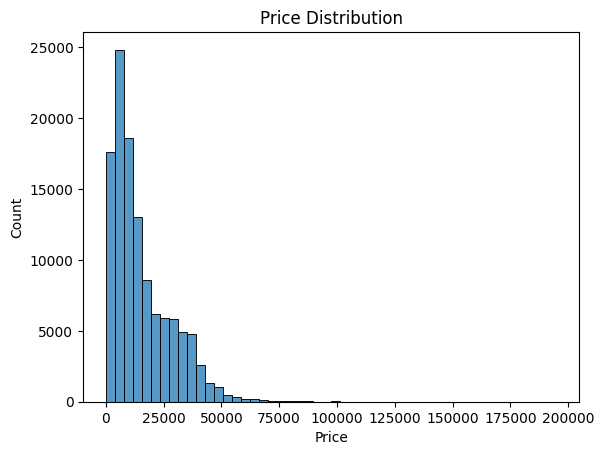

In [18]:
#Price distribution
sns.histplot(data=car_nonul1.query('price<200000'), x="price",bins=50)
plt.xlabel("Price")
plt.title("Price Distribution")
plt.show()

Most the car prices distribution is between 0 and 50000, to increase the accuracy of the model the data is filtered to include only cars that cost more that 2000 $ and upto 40000. Any cars less than $2000 are not reliable for resale and are usually sent to scrap metal

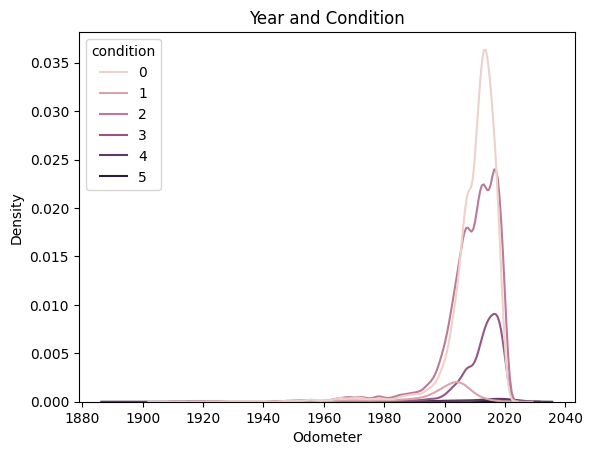

In [19]:
# Distribution by year of manufacture
sns.kdeplot(data=car_nonul1, x="year", hue="condition")
plt.xlabel("Odometer")
plt.title("Year and Condition")
plt.show()

This plot shows the count of the cars in each year of production, we can safely remove the outliers and consider only cars made after 2000 for our analysis

Percentile distribution of the used car data

In [20]:
car_nonul1.describe(percentiles = [.05,.1, .9,.95])

,price,year,manufacturer,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color
count,1.171690e+05,117169.000000,117169.000000,117169.000000,117169.000000,117169.000000,1.171690e+05,117169.000000,117169.000000,117169.000000,117169.000000
mean,6.082322e+04,2009.400149,18.730364,1.194249,4.639487,1.930562,1.122838e+05,0.281918,0.814149,6.040847,5.623458
std,1.140808e+07,9.925172,11.490417,1.155768,1.277759,0.543190,2.247850e+05,0.642434,0.791092,4.065271,4.016522
min,0.000000e+00,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
5%,2.990000e+02,1994.000000,4.000000,0.000000,3.000000,0.000000,1.140100e+04,0.000000,0.000000,0.000000,0.000000
10%,2.688000e+03,2001.000000,7.000000,0.000000,3.000000,2.000000,2.287000e+04,0.000000,0.000000,0.000000,0.000000
50%,1.099300e+04,2012.000000,14.000000,2.000000,5.000000,2.000000,1.027990e+05,0.000000,1.000000,8.000000,8.000000
90%,3.500000e+04,2018.000000,39.000000,3.000000,6.000000,2.000000,1.900000e+05,2.000000,2.000000,10.000000,10.000000
95%,3.995000e+04,2019.000000,39.000000,3.000000,6.000000,2.000000,2.173690e+05,2.000000,2.000000,11.000000,10.000000
max,3.736929e+09,2022.000000,41.000000,5.000000,7.000000,4.000000,1.000000e+07,2.000000,2.000000,12.000000,11.000000


Filter the data by selecting only the cars worth between 1k - 40k and made after 2000

In [21]:
car_nonul1=car_nonul1[car_nonul1['price'] > 1000]
car_nonul1=car_nonul1[car_nonul1['price'] < 40000]
car_nonul1=car_nonul1[car_nonul1['year']  > 2000]

car_nonul1.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 94595 entries, 31 to 426878
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   price         94595 non-null  int64
 1   year          94595 non-null  int64
 2   manufacturer  94595 non-null  int64
 3   condition     94595 non-null  int64
 4   cylinders     94595 non-null  int64
 5   fuel          94595 non-null  int64
 6   odometer      94595 non-null  int64
 7   transmission  94595 non-null  int64
 8   drive         94595 non-null  int64
 9   type          94595 non-null  int64
 10  paint_color   94595 non-null  int64
dtypes: int64(11)
memory usage: 8.7 MB


The correlation matrix for the used car data is as follows.

In [22]:
# create correlation matrix
car_nonul1.corr()

,price,year,manufacturer,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color
price,1.000000,0.635532,-0.071732,0.135571,0.347790,-0.048386,-0.349621,0.503058,-0.066336,0.048857,0.046619
year,0.635532,1.000000,-0.024762,0.071829,-0.106149,0.127508,-0.362353,0.300920,-0.048026,0.021643,0.008557
manufacturer,-0.071732,-0.024762,1.000000,-0.028072,-0.225863,0.013609,0.022136,-0.015715,-0.102731,0.008446,-0.008882
condition,0.135571,0.071829,-0.028072,1.000000,0.079089,0.040504,-0.054807,0.229888,0.053605,0.049267,0.004924
cylinders,0.347790,-0.106149,-0.225863,0.079089,1.000000,-0.099857,0.028791,0.174373,-0.024222,0.020167,0.028661
fuel,-0.048386,0.127508,0.013609,0.040504,-0.099857,1.000000,-0.099988,0.128360,0.038931,-0.101539,-0.059390
odometer,-0.349621,-0.362353,0.022136,-0.054807,0.028791,-0.099988,1.000000,-0.229791,-0.048656,-0.003166,0.008139
transmission,0.503058,0.300920,-0.015715,0.229888,0.174373,0.128360,-0.229791,1.000000,0.046249,0.002652,-0.019064
drive,-0.066336,-0.048026,-0.102731,0.053605,-0.024222,0.038931,-0.048656,0.046249,1.000000,0.163839,0.082545
type,0.048857,0.021643,0.008446,0.049267,0.020167,-0.101539,-0.003166,0.002652,0.163839,1.000000,0.072392


<Axes: >

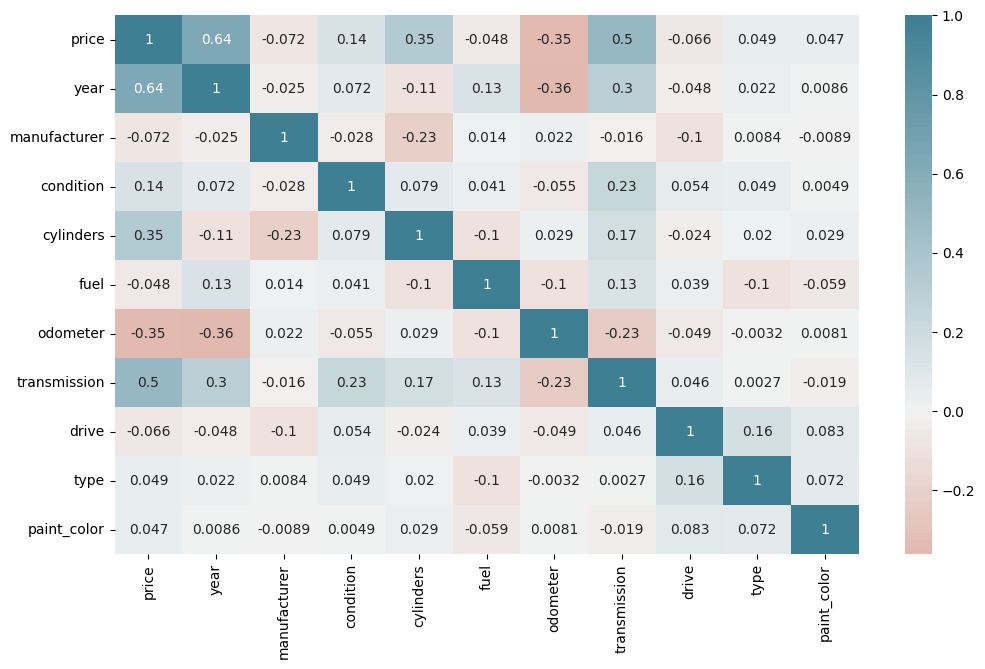

In [23]:
# Correlation chart
plt.subplots(figsize = (12,7))
sns.heatmap(car_nonul1.corr(),annot=True,cmap=sns.diverging_palette(20, 220, n=200),center=0)


We can see a strong correlation between - price and year,cylinders, transmission and condition

In [24]:
# remove the target column from the DF
y=car_nonul1['price']
car_nonul1.drop(columns=['price'],axis=1,inplace=True)

In [25]:
# Run the data through standard scaler
scaler = StandardScaler()
X= pd.DataFrame(scaler.fit_transform(car_nonul1), columns = car_nonul1.columns)
X.head()

,year,manufacturer,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color
0,0.331588,-0.521216,-1.032961,0.358814,0.080751,0.167940,-0.424766,1.599208,0.977097,-1.395665
1,0.125191,-0.434642,0.711648,1.156530,0.080751,-0.376236,2.644340,-1.029823,0.488728,-1.395665
2,0.950779,-1.040661,0.711648,0.358814,0.080751,-0.735909,2.644340,-1.029823,0.488728,0.843994
3,1.569970,1.729710,-1.032961,0.358814,0.080751,-0.612024,-0.424766,-1.029823,0.977097,-0.151410
4,0.950779,-1.040661,0.711648,0.358814,0.080751,-0.847829,2.644340,-1.029823,0.488728,0.595143


In [26]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94595 entries, 0 to 94594
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          94595 non-null  float64
 1   manufacturer  94595 non-null  float64
 2   condition     94595 non-null  float64
 3   cylinders     94595 non-null  float64
 4   fuel          94595 non-null  float64
 5   odometer      94595 non-null  float64
 6   transmission  94595 non-null  float64
 7   drive         94595 non-null  float64
 8   type          94595 non-null  float64
 9   paint_color   94595 non-null  float64
dtypes: float64(10)
memory usage: 7.2 MB


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [27]:
#Split the data set in to test and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [28]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66216 entries, 27581 to 15795
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          66216 non-null  float64
 1   manufacturer  66216 non-null  float64
 2   condition     66216 non-null  float64
 3   cylinders     66216 non-null  float64
 4   fuel          66216 non-null  float64
 5   odometer      66216 non-null  float64
 6   transmission  66216 non-null  float64
 7   drive         66216 non-null  float64
 8   type          66216 non-null  float64
 9   paint_color   66216 non-null  float64
dtypes: float64(10)
memory usage: 5.6 MB


In [29]:
y_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 66216 entries, 135692 to 78043
Series name: price
Non-Null Count  Dtype
--------------  -----
66216 non-null  int64
dtypes: int64(1)
memory usage: 1.0 MB


In [30]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28379 entries, 72174 to 10993
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          28379 non-null  float64
 1   manufacturer  28379 non-null  float64
 2   condition     28379 non-null  float64
 3   cylinders     28379 non-null  float64
 4   fuel          28379 non-null  float64
 5   odometer      28379 non-null  float64
 6   transmission  28379 non-null  float64
 7   drive         28379 non-null  float64
 8   type          28379 non-null  float64
 9   paint_color   28379 non-null  float64
dtypes: float64(10)
memory usage: 2.4 MB


In [31]:
y_test.info()

<class 'pandas.core.series.Series'>
Int64Index: 28379 entries, 322804 to 55447
Series name: price
Non-Null Count  Dtype
--------------  -----
28379 non-null  int64
dtypes: int64(1)
memory usage: 443.4 KB


In [32]:
# Create linear reg model
lin_reg = LinearRegression(fit_intercept=False)
model1 = lin_reg.fit(X, y)

y_predict = model1.predict(X)
linreg_mse = mean_squared_error(y,y_predict)
linreg_mae = mean_absolute_error(y,y_predict)
linreg_r2 = r2_score(y,y_predict)
print(linreg_r2)
# Create a dataframe and add the linear reg coefficients for each feature
score_coef=pd.DataFrame(zip(X.columns, model1.coef_))
score_coef.columns=["feature","Linear"]
score_coef




-1.3853066585214995


,feature,Linear
0,year,6017.893080
1,manufacturer,280.505285
2,condition,78.903646
3,cylinders,3771.222758
4,fuel,-1321.155085
5,odometer,-1153.715174
6,transmission,2781.833219
7,drive,-495.282884
8,type,216.099208
9,paint_color,345.716995


In [33]:
# define a params list to perform grid search cross validation for ridge and lasso regressions
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0,
                    10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()
grid_cv_model = GridSearchCV(estimator=ridge,param_grid=params,scoring='neg_mean_absolute_error',cv=5,return_train_score=True,verbose=1)
grid_cv_model.fit(X_train,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

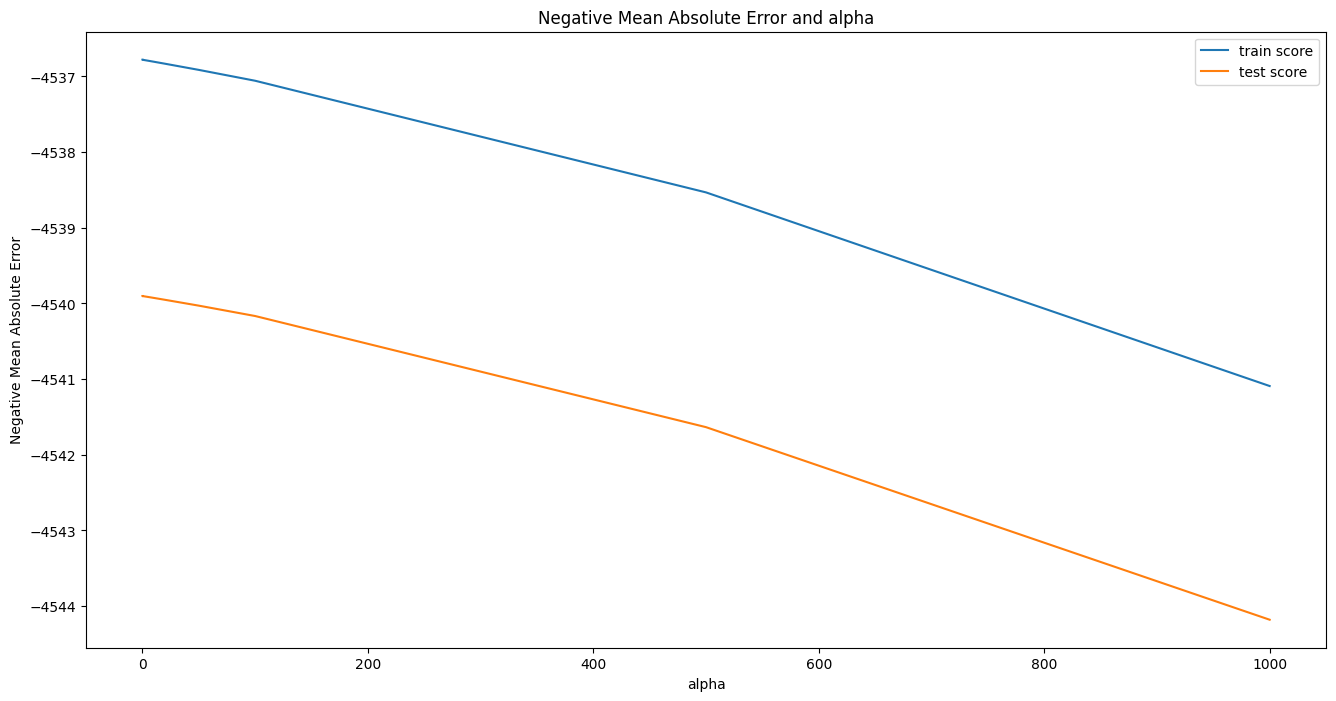

In [34]:
#plot the grid search cv results to determine the best value for alpha
cv_results = pd.DataFrame(grid_cv_model.cv_results_)
cv_results.head()
# changing datatype of 'param_alpha' into int
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.figure(figsize=(16,8))
plt.plot(cv_results['param_alpha'],cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'],cv_results['mean_test_score'])

plt.title('Negative Mean Absolute Error and alpha')
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.legend(['train score','test score'],loc='upper right')

plt.show()

In [35]:
# Best alpha for ridge model
grid_cv_model.best_params_

{'alpha': 0.0001}

In [36]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0,
                    10.0, 20, 50, 100, 500, 1000 ]}


lasso = Lasso()
grid_cv_model = GridSearchCV(estimator=lasso,param_grid=params,scoring='neg_mean_absolute_error',cv=5,return_train_score=True,verbose=1)
grid_cv_model.fit(X_train,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

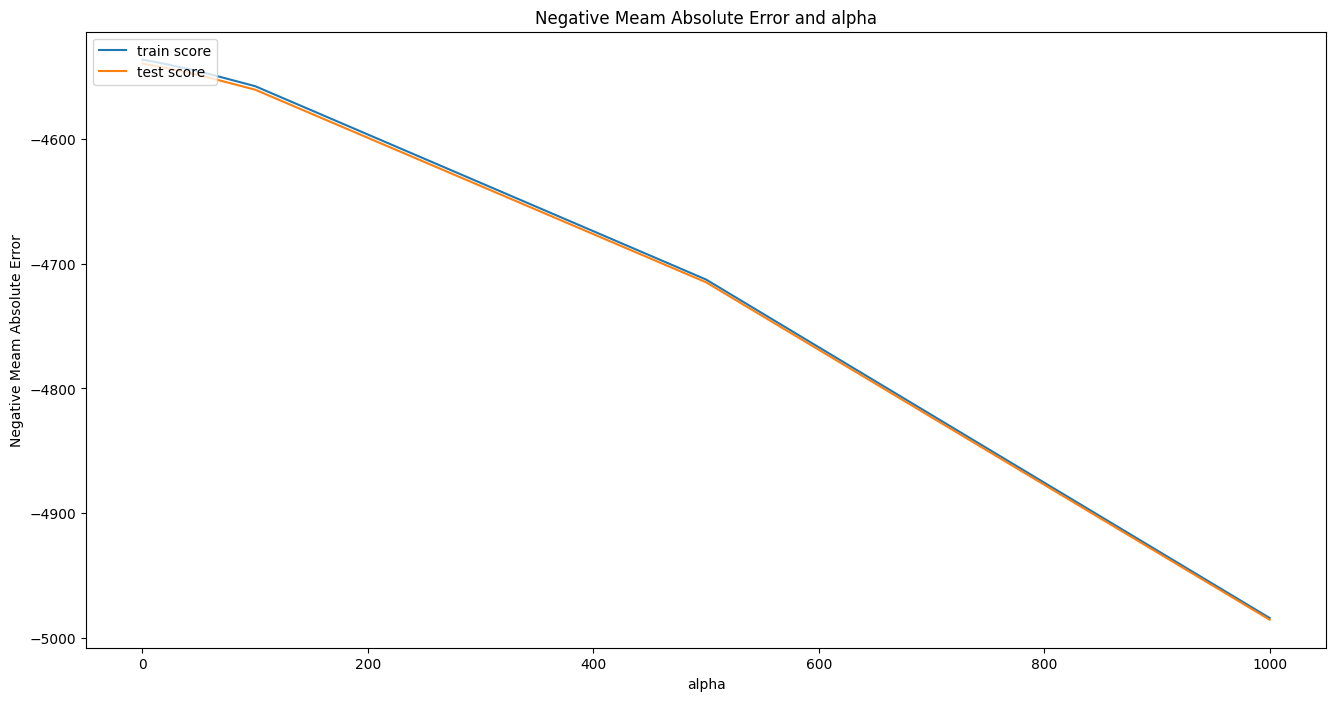

In [37]:
#plot the grid search cv results to determine the best value for alpha
cv_results = pd.DataFrame(grid_cv_model.cv_results_)
# changing param_alpha datatype to float
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.figure(figsize=(16,8))
plt.plot(cv_results['param_alpha'],cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'],cv_results['mean_test_score'])

plt.title('Negative Meam Absolute Error and alpha')
plt.xlabel('alpha')
plt.ylabel('Negative Meam Absolute Error')
plt.legend(['train score','test score'],loc='upper left')

plt.show()

In [38]:
# Best alpha for lasso model
grid_cv_model.best_params_



{'alpha': 0.0001}

In [39]:
#Create Lasso model
lass = linear_model.Lasso(alpha=0.0001)
model2 = lass.fit(X_train,y_train)
y_pred=model2.predict(X_train)
lass_mse=mean_squared_error(y_train,y_pred)
lass_mae=mean_absolute_error(y_train,y_pred)
lass_r2=r2_score(y_train,y_pred)
print("Coef",model2.coef_,"\n","MSE",lass_mse,"\n","MAE",lass_mae,"\n","R2 Score",lass_r2)
score_coef["lasso"]=pd.Series(model2.coef_)
score_coef

Coef [ 6027.44946573   286.38923056    60.53698228  3747.88960729
 -1336.00663211 -1196.86136697  2788.25561289  -478.08856277
   226.88131289   359.96322437] 
 MSE 37344081.810359105 
 MAE 4539.953447360925 
 R2 Score 0.6677032714363489


,feature,Linear,lasso
0,year,6017.893080,6027.449466
1,manufacturer,280.505285,286.389231
2,condition,78.903646,60.536982
3,cylinders,3771.222758,3747.889607
4,fuel,-1321.155085,-1336.006632
5,odometer,-1153.715174,-1196.861367
6,transmission,2781.833219,2788.255613
7,drive,-495.282884,-478.088563
8,type,216.099208,226.881313
9,paint_color,345.716995,359.963224


In [40]:
#create the ridge model
ridg = Ridge(alpha=0.0001)
model3 = ridg.fit(X_train,y_train)
y_pred=model3.predict(X_train)
ridg_mse=mean_squared_error(y_train,y_pred)
ridg_mae=mean_absolute_error(y_train,y_pred)
ridg_r2=r2_score(y_train,y_pred)
print("Coef",model3.coef_,"\n","MSE",ridg_mse,"\n","MAE",ridg_mae,"\n","R2 Score",ridg_r2)
score_coef["Ridge"]=pd.Series(model3.coef_)
score_coef

Coef [ 6027.44952286   286.38934086    60.53706407  3747.88969982
 -1336.00672577 -1196.8614506   2788.25565819  -478.08867649
   226.8814064    359.9633197 ] 
 MSE 37344081.810359016 
 MAE 4539.9534322384325 
 R2 Score 0.6677032714363496


,feature,Linear,lasso,Ridge
0,year,6017.893080,6027.449466,6027.449523
1,manufacturer,280.505285,286.389231,286.389341
2,condition,78.903646,60.536982,60.537064
3,cylinders,3771.222758,3747.889607,3747.889700
4,fuel,-1321.155085,-1336.006632,-1336.006726
5,odometer,-1153.715174,-1196.861367,-1196.861451
6,transmission,2781.833219,2788.255613,2788.255658
7,drive,-495.282884,-478.088563,-478.088676
8,type,216.099208,226.881313,226.881406
9,paint_color,345.716995,359.963224,359.963320


With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this. We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices. Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.


The ridge model performance is slightly better than the other two

<Axes: xlabel='feature'>

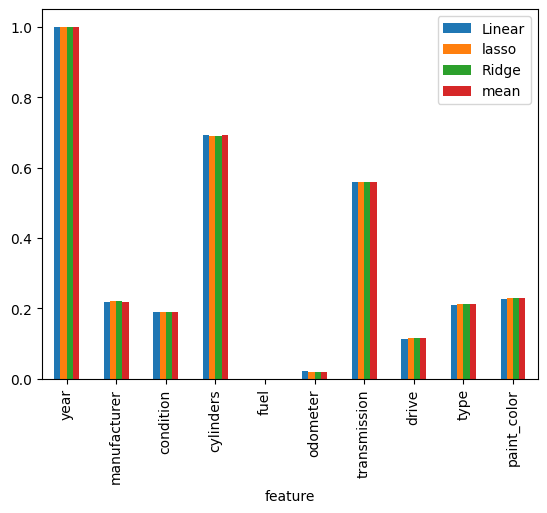

In [41]:
# Plot the feature importance
score_coef=score_coef.set_index('feature')
score_coef=pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(score_coef),columns=score_coef.columns,index=score_coef.index)
score_coef['mean']=score_coef.mean(axis=1)
score_coef.plot(kind='bar')


Deployment

This plot shows the importance of each feature in the data set , The 3 important features that drive the car price are

1. Year of manufacture
2. The number of cylinders in the car
3. Transmission

The other features that are about same importance are
1. Paint color
2. Car type (van, suv, sedan, cuv etc)
3. Manufacturer
4. Condition

It is suprising to see that the fuel type and odometer mileage are not a significant factors in determing the price of the car.

